In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, brier_score_loss

In [2]:
pd_non_pension_dev = pd.read_pickle(r'file1')
pd_non_pension_val = pd.read_pickle(r'file2')
pd_non_pension_oot = pd.read_pickle(r'file3')

pd_pension_dev = pd.read_pickle(r'file4')
pd_pension_val = pd.read_pickle(r'file5')
pd_pension_oot = pd.read_pickle(r'file6')

pd_street_dev = pd.read_pickle(r'file7')
pd_street_val = pd.read_pickle(r'file8')
pd_street_oot = pd.read_pickle(r'file9')

pd_rest_dev = pd.read_pickle(r'file10')
pd_rest_val = pd.read_pickle(r'file11')
pd_rest_oot = pd.read_pickle(r'file12')

In [3]:
masterlist_np_devval = pd.read_pickle(r'file13')
masterlist_np_oot = pd.read_pickle(r'file14')

masterlist_p_devval = pd.read_pickle(r'file15')
masterlist_p_oot = pd.read_pickle(r'file16')

masterlist_s_devval = pd.read_pickle(r'file17')
masterlist_s_oot = pd.read_pickle(r'file18')

masterlist_r = pd.read_pickle(r'file19')

In [36]:
# pd_pension_oot
# masterlist_p_oot

In [4]:
masterlist_r_dev = masterlist_r[masterlist_r['tag'] == 'DEV']
masterlist_r_val = masterlist_r[masterlist_r['tag'] == 'VAL']
masterlist_r_oot = masterlist_r[masterlist_r['tag'] == 'OOT']

In [5]:
df_np_dev = pd_non_pension_dev.drop_duplicates()
df_np_val = pd_non_pension_val.drop_duplicates()
df_np_oot = pd_non_pension_oot.drop_duplicates()

df_p_dev = pd_pension_dev.drop_duplicates()
df_p_val = pd_pension_val.drop_duplicates()
df_p_oot = pd_pension_oot.drop_duplicates()

df_s_dev = pd_street_dev.drop_duplicates()
df_s_val = pd_street_val.drop_duplicates()
df_s_oot = pd_street_oot.drop_duplicates()

df_r_dev = pd_rest_dev.drop_duplicates()
df_r_val = pd_rest_val.drop_duplicates()
df_r_oot = pd_rest_oot.drop_duplicates()

In [6]:
df_np_dev = df_np_dev[['CONTRACT_REF_NO','final_pd']]
df_np_val = df_np_val[['CONTRACT_REF_NO','final_pd']]
df_np_oot = df_np_oot[['CONTRACT_REF_NO','final_pd']]

df_p_dev = df_p_dev[['CONTRACT_REF_NO','final_pd']]
df_p_val = df_p_val[['CONTRACT_REF_NO','final_pd']]
df_p_oot = df_p_oot[['CONTRACT_REF_NO','final_pd']]

df_s_dev = df_s_dev[['CONTRACT_REF_NO','final_pd']]
df_s_val = df_s_val[['CONTRACT_REF_NO','final_pd']]
df_s_oot = df_s_oot[['CONTRACT_REF_NO','final_pd']]

df_r_dev = df_r_dev[['CONTRACT_REF_NO','pred_prob_final']]
df_r_val = df_r_val[['CONTRACT_REF_NO','pred_prob_final']]
df_r_oot = df_r_oot[['CONTRACT_REF_NO','pred_prob_final']]

In [7]:
masterlist_np_dev = masterlist_np_devval.loc[masterlist_np_devval['tag'] == 'DEV']
masterlist_np_val = masterlist_np_devval.loc[masterlist_np_devval['tag'] == 'VAL']

masterlist_p_dev = masterlist_p_devval.loc[masterlist_p_devval['tag'] == 'DEV']
masterlist_p_val = masterlist_p_devval.loc[masterlist_p_devval['tag'] == 'VAL']

masterlist_s_dev = masterlist_s_devval.loc[masterlist_s_devval['tag'] == 'DEV']
masterlist_s_val = masterlist_s_devval.loc[masterlist_s_devval['tag'] == 'VAL']

In [8]:
masterlist_np_dev = masterlist_np_dev[['CONTRACT_REF_NO','bad_flag']]
masterlist_np_val = masterlist_np_val[['CONTRACT_REF_NO','bad_flag']]

masterlist_p_dev = masterlist_p_dev[['CONTRACT_REF_NO','bad_flag']]
masterlist_p_val = masterlist_p_val[['CONTRACT_REF_NO','bad_flag']]

masterlist_s_dev = masterlist_s_dev[['CONTRACT_REF_NO','bad_flag']]
masterlist_s_val = masterlist_s_val[['CONTRACT_REF_NO','bad_flag']]

masterlist_r_dev = masterlist_r_dev[['CONTRACT_REF_NO','bad_flag']]
masterlist_r_val = masterlist_r_val[['CONTRACT_REF_NO','bad_flag']]

In [9]:
np_dev = df_np_dev.merge(masterlist_np_dev, on=['CONTRACT_REF_NO'])
np_val = df_np_val.merge(masterlist_np_val, on=['CONTRACT_REF_NO'])
np_oot = df_np_oot.merge(masterlist_np_oot, on=['CONTRACT_REF_NO'])

In [10]:
p_dev = df_p_dev.merge(masterlist_p_dev, on=['CONTRACT_REF_NO'])
p_val = df_p_val.merge(masterlist_p_val, on=['CONTRACT_REF_NO'])
p_oot = df_p_oot.merge(masterlist_p_oot, on=['CONTRACT_REF_NO'])

In [11]:
s_dev = df_s_dev.merge(masterlist_s_dev, on=['CONTRACT_REF_NO'])
s_val = df_s_val.merge(masterlist_s_val, on=['CONTRACT_REF_NO'])
s_oot = df_s_oot.merge(masterlist_s_oot, on=['CONTRACT_REF_NO'])

In [12]:
r_dev = df_r_dev.merge(masterlist_r_dev, on=['CONTRACT_REF_NO'])
r_val = df_r_val.merge(masterlist_r_val, on=['CONTRACT_REF_NO'])
r_oot = df_r_oot.merge(masterlist_r_oot, on=['CONTRACT_REF_NO'])

In [13]:
df_np_dev = np_dev.copy()
df_p_dev = p_dev.copy()
df_s_dev = s_dev.copy()
df_r_dev = r_dev.copy()

df_np_val = np_val.copy()
df_p_val = p_val.copy()
df_s_val = s_val.copy()
df_r_val = r_val.copy()

df_np_oot = np_oot.copy()
df_p_oot = p_oot.copy()
df_s_oot = s_oot.copy()
df_r_oot = r_oot.copy()

In [14]:
df_r_dev = df_r_dev.rename(columns = {'pred_prob_final':'final_pd'})
df_r_val = df_r_val.rename(columns = {'pred_prob_final':'final_pd'})
df_r_oot = df_r_oot.rename(columns = {'pred_prob_final':'final_pd'})

In [15]:
df_np_dev = df_np_dev[['CONTRACT_REF_NO','final_pd','bad_flag']]
df_p_dev = df_p_dev[['CONTRACT_REF_NO','final_pd','bad_flag']]
df_s_dev = df_s_dev[['CONTRACT_REF_NO','final_pd','bad_flag']]
df_r_dev = df_r_dev[['CONTRACT_REF_NO','final_pd','bad_flag']]

df_np_val = df_np_val[['CONTRACT_REF_NO','final_pd','bad_flag']]
df_p_val = df_p_val[['CONTRACT_REF_NO','final_pd','bad_flag']]
df_s_val = df_s_val[['CONTRACT_REF_NO','final_pd','bad_flag']]
df_r_val = df_r_val[['CONTRACT_REF_NO','final_pd','bad_flag']]

df_np_oot = df_np_oot[['CONTRACT_REF_NO','final_pd','bad_flag']]
df_p_oot = df_p_oot[['CONTRACT_REF_NO','final_pd','bad_flag']]
df_s_oot = df_s_oot[['CONTRACT_REF_NO','final_pd','bad_flag']]
df_r_oot = df_r_oot[['CONTRACT_REF_NO','final_pd','bad_flag']]

In [16]:
df_np_dev['pd_bins'] = pd.qcut(df_np_dev['final_pd'], q=100, duplicates='drop')
df_np_val['pd_bins'] = pd.qcut(df_np_val['final_pd'], q=100, duplicates='drop')
df_np_oot['pd_bins'] = pd.qcut(df_np_oot['final_pd'], q=100, duplicates='drop')

df_p_dev['pd_bins'] = pd.qcut(df_p_dev['final_pd'], q=100, duplicates='drop')
df_p_val['pd_bins'] = pd.qcut(df_p_val['final_pd'], q=100, duplicates='drop')
df_p_oot['pd_bins'] = pd.qcut(df_p_oot['final_pd'], q=100, duplicates='drop')

df_s_dev['pd_bins'] = pd.qcut(df_s_dev['final_pd'], q=100, duplicates='drop')
df_s_val['pd_bins'] = pd.qcut(df_s_val['final_pd'], q=100, duplicates='drop')
df_s_oot['pd_bins'] = pd.qcut(df_s_oot['final_pd'], q=100, duplicates='drop')

df_r_dev['pd_bins'] = pd.qcut(df_r_dev['final_pd'], q=100, duplicates='drop')
df_r_val['pd_bins'] = pd.qcut(df_r_val['final_pd'], q=100, duplicates='drop')
df_r_oot['pd_bins'] = pd.qcut(df_r_oot['final_pd'], q=100, duplicates='drop')

In [17]:
agg_dict={'CONTRACT_REF_NO':'count','final_pd':'mean','bad_flag':'sum'}

In [18]:
df_np_dev = df_np_dev.groupby(by=['pd_bins']).agg(agg_dict).reset_index()

In [19]:
df_np_val = df_np_val.groupby(by=['pd_bins']).agg(agg_dict).reset_index()
df_np_oot = df_np_oot.groupby(by=['pd_bins']).agg(agg_dict).reset_index()

df_p_dev = df_p_dev.groupby(by=['pd_bins']).agg(agg_dict).reset_index()
df_p_val = df_p_val.groupby(by=['pd_bins']).agg(agg_dict).reset_index()
df_p_oot = df_p_oot.groupby(by=['pd_bins']).agg(agg_dict).reset_index()

df_s_dev = df_s_dev.groupby(by=['pd_bins']).agg(agg_dict).reset_index()
df_s_val = df_s_val.groupby(by=['pd_bins']).agg(agg_dict).reset_index()
df_s_oot = df_s_oot.groupby(by=['pd_bins']).agg(agg_dict).reset_index()

df_r_dev = df_r_dev.groupby(by=['pd_bins']).agg(agg_dict).reset_index()
df_r_val = df_r_val.groupby(by=['pd_bins']).agg(agg_dict).reset_index()
df_r_oot = df_r_oot.groupby(by=['pd_bins']).agg(agg_dict).reset_index()

In [24]:
df_np_dev = df_np_dev.rename(columns={"CONTRACT_REF_NO":"count_obs","bad_flag":"default"})
df_np_val = df_np_val.rename(columns={"CONTRACT_REF_NO":"count_obs","bad_flag":"default"})
df_np_oot = df_np_oot.rename(columns={"CONTRACT_REF_NO":"count_obs","bad_flag":"default"})

df_p_dev = df_p_dev.rename(columns={"CONTRACT_REF_NO":"count_obs","bad_flag":"default"})
df_p_val = df_p_val.rename(columns={"CONTRACT_REF_NO":"count_obs","bad_flag":"default"})
df_p_oot = df_p_oot.rename(columns={"CONTRACT_REF_NO":"count_obs","bad_flag":"default"})

df_s_dev = df_s_dev.rename(columns={"CONTRACT_REF_NO":"count_obs","bad_flag":"default"})
df_s_val = df_s_val.rename(columns={"CONTRACT_REF_NO":"count_obs","bad_flag":"default"})
df_s_oot = df_s_oot.rename(columns={"CONTRACT_REF_NO":"count_obs","bad_flag":"default"})

df_r_dev = df_r_dev.rename(columns={"CONTRACT_REF_NO":"count_obs","bad_flag":"default"})
df_r_val = df_r_val.rename(columns={"CONTRACT_REF_NO":"count_obs","bad_flag":"default"})
df_r_oot = df_r_oot.rename(columns={"CONTRACT_REF_NO":"count_obs","bad_flag":"default"})

In [25]:
df_np_dev['non_default'] = df_np_dev['count_obs'] - df_np_dev['default']
df_np_val['non_default'] = df_np_val['count_obs'] - df_np_val['default']
df_np_oot['non_default'] = df_np_oot['count_obs'] - df_np_oot['default']

df_p_dev['non_default'] = df_p_dev['count_obs'] - df_p_dev['default']
df_p_val['non_default'] = df_p_val['count_obs'] - df_p_val['default']
df_p_oot['non_default'] = df_p_oot['count_obs'] - df_p_oot['default']

df_s_dev['non_default'] = df_s_dev['count_obs'] - df_s_dev['default']
df_s_val['non_default'] = df_s_val['count_obs'] - df_s_val['default']
df_s_oot['non_default'] = df_s_oot['count_obs'] - df_s_oot['default']

df_r_dev['non_default'] = df_r_dev['count_obs'] - df_r_dev['default']
df_r_val['non_default'] = df_r_val['count_obs'] - df_r_val['default']
df_r_oot['non_default'] = df_r_oot['count_obs'] - df_r_oot['default']

In [26]:
df_np_dev['default_fraction'] = df_np_dev['default']/df_np_dev['count_obs']
df_np_val['default_fraction'] = df_np_val['default']/df_np_val['count_obs']
df_np_oot['default_fraction'] = df_np_oot['default']/df_np_oot['count_obs']

df_p_dev['default_fraction'] = df_p_dev['default']/df_p_dev['count_obs']
df_p_val['default_fraction'] = df_p_val['default']/df_p_val['count_obs']
df_p_oot['default_fraction'] = df_p_oot['default']/df_p_oot['count_obs']

df_s_dev['default_fraction'] = df_s_dev['default']/df_s_dev['count_obs']
df_s_val['default_fraction'] = df_s_val['default']/df_s_val['count_obs']
df_s_oot['default_fraction'] = df_s_oot['default']/df_s_oot['count_obs']

df_r_dev['default_fraction'] = df_r_dev['default']/df_r_dev['count_obs']
df_r_val['default_fraction'] = df_r_val['default']/df_r_val['count_obs']
df_r_oot['default_fraction'] = df_r_oot['default']/df_r_oot['count_obs']

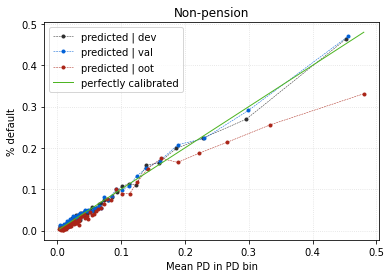

In [27]:
import matplotlib.pyplot as plt

f = plt.figure()
# f.set_figwidth(20)
# f.set_figheight(10)

x_np_dev = df_np_dev['final_pd'].to_list()
y_np_dev = df_np_dev['default_fraction'].to_list()
x_ideal_np = df_np_oot['final_pd'].to_list()
y_ideal_np = df_np_oot['final_pd'].to_list()

x_np_val = df_np_val['final_pd'].to_list()
y_np_val = df_np_val['default_fraction'].to_list()

x_np_oot = df_np_oot['final_pd'].to_list()
y_np_oot = df_np_oot['default_fraction'].to_list()

plt.plot(x_np_dev, y_np_dev,
         label="predicted | dev",
         color="#2D2D2D",
         linewidth=0.5,
         linestyle='dashed',
         marker='o',
         markersize=3)
plt.plot(x_np_val, y_np_val,
         label="predicted | val",
         color="#0060D7",
         linewidth=0.5,
         linestyle='dashed',
         marker='o',
         markersize=3)
plt.plot(x_np_oot, y_np_oot,
         label="predicted | oot",
         color="#AA2417",
         linewidth=0.5,
         linestyle='dashed',
         marker='o',
         markersize=3)
plt.plot(x_ideal_np, y_ideal_np,
         label="perfectly calibrated",
         color="#4EB523",
         linewidth=1,
         markersize=3)

plt.title('Non-pension')
plt.xlabel('Mean PD in PD bin')
plt.ylabel('% default')

plt.legend()
plt.grid(linestyle=':', color='#dedede')

plt.show()

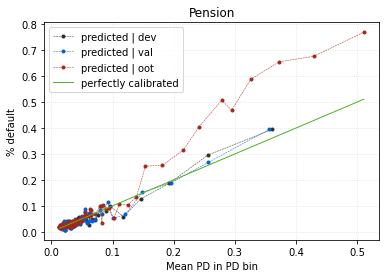

In [33]:
f = plt.figure()

x_np_dev = df_p_dev['final_pd'].to_list()
y_np_dev = df_p_dev['default_fraction'].to_list()
x_ideal_np_dev = df_p_dev['final_pd'].to_list()
y_ideal_np_dev = df_p_dev['final_pd'].to_list()

x_np_val = df_p_val['final_pd'].to_list()
y_np_val = df_p_val['default_fraction'].to_list()
x_ideal_np_val = df_p_val['final_pd'].to_list()
y_ideal_np_val = df_p_val['final_pd'].to_list()

x_np_oot = df_p_oot['final_pd'].to_list()
y_np_oot = df_p_oot['default_fraction'].to_list()
x_ideal_np_oot = df_p_oot['final_pd'].to_list()
y_ideal_np_oot = df_p_oot['final_pd'].to_list()

plt.plot(x_np_dev, y_np_dev,
         label="predicted | dev",
         color="#2D2D2D",
         linewidth=0.5,
         linestyle='dashed',
         marker='o',
         markersize=3)
plt.plot(x_np_val, y_np_val,
         label="predicted | val",
         color="#0060D7",
         linewidth=0.5,
         linestyle='dashed',
         marker='o',
         markersize=3)
plt.plot(x_np_oot, y_np_oot,
         label="predicted | oot",
         color="#AA2417",
         linewidth=0.5,
         linestyle='dashed',
         marker='o',
         markersize=3)
plt.plot(x_ideal_np_oot, y_ideal_np_oot,
         label="perfectly calibrated",
         color="#4EB523",
         linewidth=1,
         markersize=3)

plt.title('Pension')
plt.xlabel('Mean PD in PD bin')
plt.ylabel('% default')

plt.legend()
plt.grid(linestyle=':', color='#dedede')

plt.show()

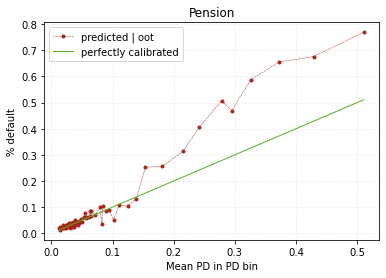

In [29]:
f = plt.figure()

x_np_dev = df_p_dev['final_pd'].to_list()
y_np_dev = df_p_dev['default_fraction'].to_list()
x_ideal_np_dev = df_p_dev['final_pd'].to_list()
y_ideal_np_dev = df_p_dev['final_pd'].to_list()

x_np_val = df_p_val['final_pd'].to_list()
y_np_val = df_p_val['default_fraction'].to_list()
x_ideal_np_val = df_p_val['final_pd'].to_list()
y_ideal_np_val = df_p_val['final_pd'].to_list()

x_np_oot = df_p_oot['final_pd'].to_list()
y_np_oot = df_p_oot['default_fraction'].to_list()
x_ideal_np_oot = df_p_oot['final_pd'].to_list()
y_ideal_np_oot = df_p_oot['final_pd'].to_list()

# plt.plot(x_np_dev, y_np_dev,
#          label="predicted | dev",
#          color="#2D2D2D",
#          linewidth=0.5,
#          linestyle='dashed',
#          marker='o',
#          markersize=3)
# plt.plot(x_np_val, y_np_val,
#          label="predicted | val",
#          color="#0060D7",
#          linewidth=0.5,
#          linestyle='dashed',
#          marker='o',
#          markersize=3)
plt.plot(x_np_oot, y_np_oot,
         label="predicted | oot",
         color="#AA2417",
         linewidth=0.5,
         linestyle='dashed',
         marker='o',
         markersize=3)
# plt.plot(x_ideal_np_dev, y_ideal_np_dev,
#          label="perfectly calibrated",
#          color="#4EB523",
#          linewidth=1,
#          markersize=3)
# plt.plot(x_ideal_np_val, y_ideal_np_val,
#          label="perfectly calibrated",
#          color="#4EB523",
#          linewidth=1,
#          markersize=3)
plt.plot(x_ideal_np_oot, y_ideal_np_oot,
         label="perfectly calibrated",
         color="#4EB523",
         linewidth=1,
         markersize=3)

plt.title('Pension')
plt.xlabel('Mean PD in PD bin')
plt.ylabel('% default')

plt.legend()
plt.grid(linestyle=':', color='#dedede')

plt.show()

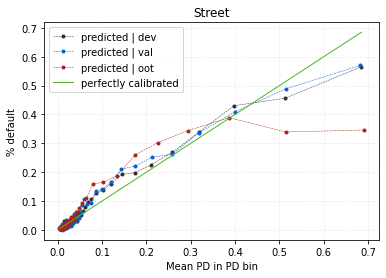

In [30]:
f = plt.figure()

x_np_dev = df_s_dev['final_pd'].to_list()
y_np_dev = df_s_dev['default_fraction'].to_list()
x_ideal_np_dev = df_s_dev['final_pd'].to_list()
y_ideal_np_dev = df_s_dev['final_pd'].to_list()

x_np_val = df_s_val['final_pd'].to_list()
y_np_val = df_s_val['default_fraction'].to_list()
x_ideal_np_val = df_s_val['final_pd'].to_list()
y_ideal_np_val = df_s_val['final_pd'].to_list()

x_np_oot = df_s_oot['final_pd'].to_list()
y_np_oot = df_s_oot['default_fraction'].to_list()
x_ideal_np_oot = df_s_oot['final_pd'].to_list()
y_ideal_np_oot = df_s_oot['final_pd'].to_list()

plt.plot(x_np_dev, y_np_dev,
         label="predicted | dev",
         color="#2D2D2D",
         linewidth=0.5,
         linestyle='dashed',
         marker='o',
         markersize=3)
plt.plot(x_np_val, y_np_val,
         label="predicted | val",
         color="#0060D7",
         linewidth=0.5,
         linestyle='dashed',
         marker='o',
         markersize=3)
plt.plot(x_np_oot, y_np_oot,
         label="predicted | oot",
         color="#AA2417",
         linewidth=0.5,
         linestyle='dashed',
         marker='o',
         markersize=3)
plt.plot(x_ideal_np_dev, y_ideal_np_dev,
         label="perfectly calibrated",
         color="#4EB523",
         linewidth=1,
         markersize=3)

plt.title('Street')
plt.xlabel('Mean PD in PD bin')
plt.ylabel('% default')

plt.legend()
plt.grid(linestyle=':', color='#dedede')

plt.show()

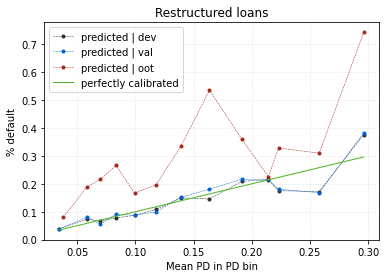

In [31]:
f = plt.figure()

x_np_dev = df_r_dev['final_pd'].to_list()
y_np_dev = df_r_dev['default_fraction'].to_list()
x_ideal_np_dev = df_r_dev['final_pd'].to_list()
y_ideal_np_dev = df_r_dev['final_pd'].to_list()

x_np_val = df_r_val['final_pd'].to_list()
y_np_val = df_r_val['default_fraction'].to_list()
x_ideal_np_val = df_r_val['final_pd'].to_list()
y_ideal_np_val = df_r_val['final_pd'].to_list()

x_np_oot = df_r_oot['final_pd'].to_list()
y_np_oot = df_r_oot['default_fraction'].to_list()
x_ideal_np_oot = df_r_oot['final_pd'].to_list()
y_ideal_np_oot = df_r_oot['final_pd'].to_list()

plt.plot(x_np_dev, y_np_dev,
         label="predicted | dev",
         color="#2D2D2D",
         linewidth=0.5,
         linestyle='dashed',
         marker='o',
         markersize=3)
plt.plot(x_np_val, y_np_val,
         label="predicted | val",
         color="#0060D7",
         linewidth=0.5,
         linestyle='dashed',
         marker='o',
         markersize=3)
plt.plot(x_np_oot, y_np_oot,
         label="predicted | oot",
         color="#AA2417",
         linewidth=0.5,
         linestyle='dashed',
         marker='o',
         markersize=3)
plt.plot(x_ideal_np_dev, y_ideal_np_dev,
         label="perfectly calibrated",
         color="#4EB523",
         linewidth=1,
         markersize=3)

plt.title('Restructured loans')
plt.xlabel('Mean PD in PD bin')
plt.ylabel('% default')

plt.legend()
plt.grid(linestyle=':', color='#dedede')

plt.show()